# Lead Scoring Case Study

>****~~ Contributors: Hrishikesh Pradhan, Hitesh Padal, Imtiyazahamad Mullanavar ~~****

>    >    *Batch ID: 5705   ::   Telegram group title: DS C67 April 2024*
        
>    >    *Batch Contact person (aka. Buddy): Shirin Singh*

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration to supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data set

df = pd.read_csv("Leads.csv")
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


----

## Step 1: Data Cleaning

In [6]:
# Checking if there are duplicates present under Prospect ID & Lead Number.

duplicate_prospect_ID = df.duplicated(subset = 'Prospect ID')
print (sum(duplicate_prospect_ID) == 0)   

True


In [7]:
duplicate_LeadNo = df.duplicated(subset = 'Lead Number')
print(sum(duplicate_LeadNo) == 0)

True


There are no duplicates present in Prospect ID & Lead Number, so we can drop these columns

In [8]:
# Removing Prospect ID & Lead Number from the data set
df.drop(['Prospect ID', 'Lead Number'],axis = 1, inplace = True)

In [9]:
# Checking null values in every column
df.isna().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
I agree to pay the amount through cheque            0
A free copy of Mastering The

In [10]:
# Converting the value 'Select' to Null
df = df.replace('Select', np.nan)

In [11]:
# Checking null values again
df.isna().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Co

In [12]:
# Percentage of Null values in every column
round(df.isna().sum().sort_values(ascending=False)/len(df)*100, 2)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me 

In [13]:
# Checking value counts before dropping the columns with large proportion of Null values
for i in list(eval(round(df.isna().sum().sort_values(ascending=False)/len(df)*100, 2)[:7]
          .to_json()).keys()):
    print(df[i].value_counts(dropna=False))
    print()

How did you hear about X Education
NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

Lead Profile
NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

Lead Quality
NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

Asymmetrique Activity Score
NaN     4218
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.

In [14]:
# Removing the columns that have more than 45% of missing values
columns =df.columns

for i in columns:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, axis = 1, inplace = True)

In [15]:
# Checking percentage of Null values again
round(df.isna().sum().sort_values(ascending=False)/len(df)*100, 2)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Magazine  

Dropped columns where more than 45% of data were missing

In [16]:
# Checking value counts to understand variety in data
for i in df.select_dtypes('object').columns:
    print(df[i].value_counts(dropna=False))
    print()

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64

Last Activity
Email Opened                    3437
SMS Sent    

In [17]:
# dropping columns from further analysis due to almost no variety in data 
df.drop([
    'Do Not Call', 'What matters most to you in choosing a course',
    'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 
    'Newspaper', 'Digital Advertisement', 'Through Recommendations', 
    'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
    'Get updates on DM Content', 'I agree to pay the amount through cheque'
], axis = 1, inplace = True)

In [18]:
# Checking the City Column
df['City'].value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [19]:
df['City'].mode()

0    Mumbai
Name: City, dtype: object

In [20]:
df['City'] = df['City'].replace(np.nan,'Mumbai')

In [21]:
# Checking Specialization column
df['Specialization'].value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [22]:
# There's a possibility that some of the customer may not have mentioned specialization as it was not in the list or there aren't any, so we can impute the 'NaN' values as 'Not Specified'

df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

In [23]:
df['Specialization'].value_counts()

Specialization
Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

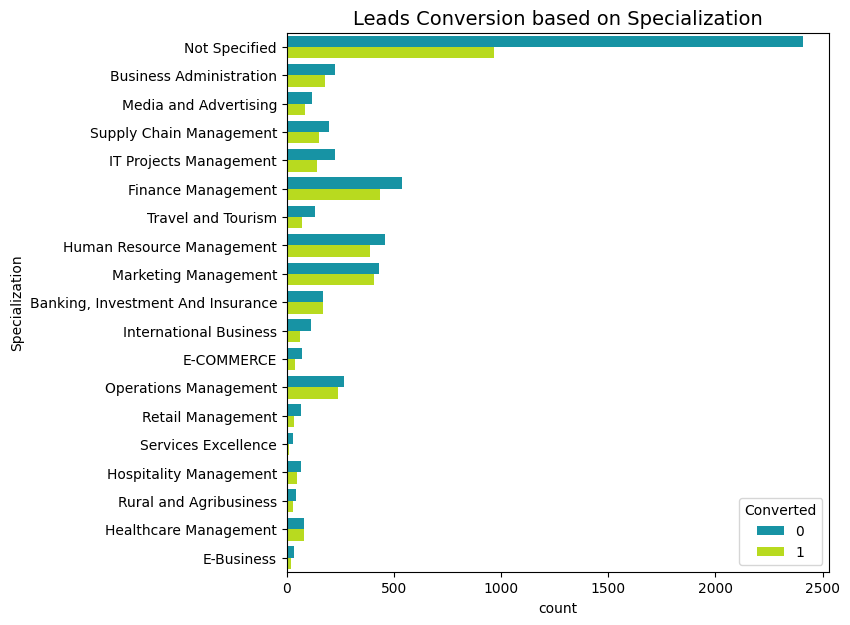

In [24]:
# Plotting the Specialization columnn 

plt.figure(figsize=(7, 7))
count_fig = sns.countplot(y='Specialization', hue='Converted', data=df, palette='nipy_spectral')
plt.title("Leads Conversion based on Specialization", fontsize=14)
plt.show()

Insights- 
1. Management has the higher number of leads converted

In [25]:
# Since Management is an import metric insde Specialisation, we could combine the entire Managements under one umbrella

df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

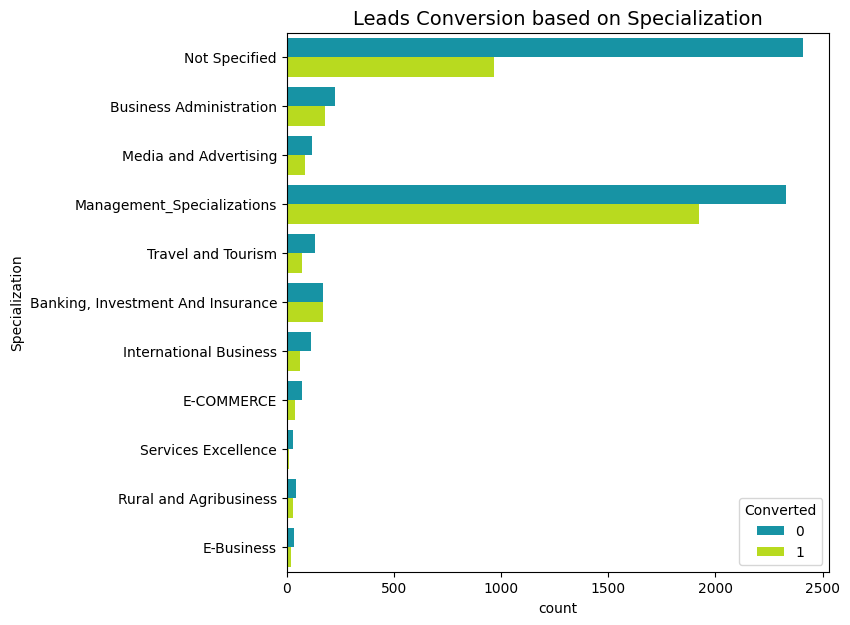

In [26]:
# Plotting Specialization column after consolidating the Management Sepcializations

plt.figure(figsize=(7, 7))
count_fig = sns.countplot(y='Specialization', hue='Converted', data=df, palette='nipy_spectral')
plt.title("Leads Conversion based on Specialization", fontsize=14)
plt.show()

In [27]:
# Checking percentage of Null values again
round(df.isna().sum().sort_values(ascending=False)/len(df)*100, 2)

Tags                                      36.29
What is your current occupation           29.11
Country                                   26.63
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Lead Origin                                0.00
Do Not Email                               0.00
Converted                                  0.00
Total Time Spent on Website                0.00
Specialization                             0.00
City                                       0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [28]:
# Checking value count of column 'Tag'
df['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

Since the lead has not confirmed on the tag, we can impute Null values as "Not Specified"

In [29]:
# Replacing 'Nan values' in Tag with 'Not Specified'
df['Tags'] = df['Tags'].replace(np.nan,'Not Specified')

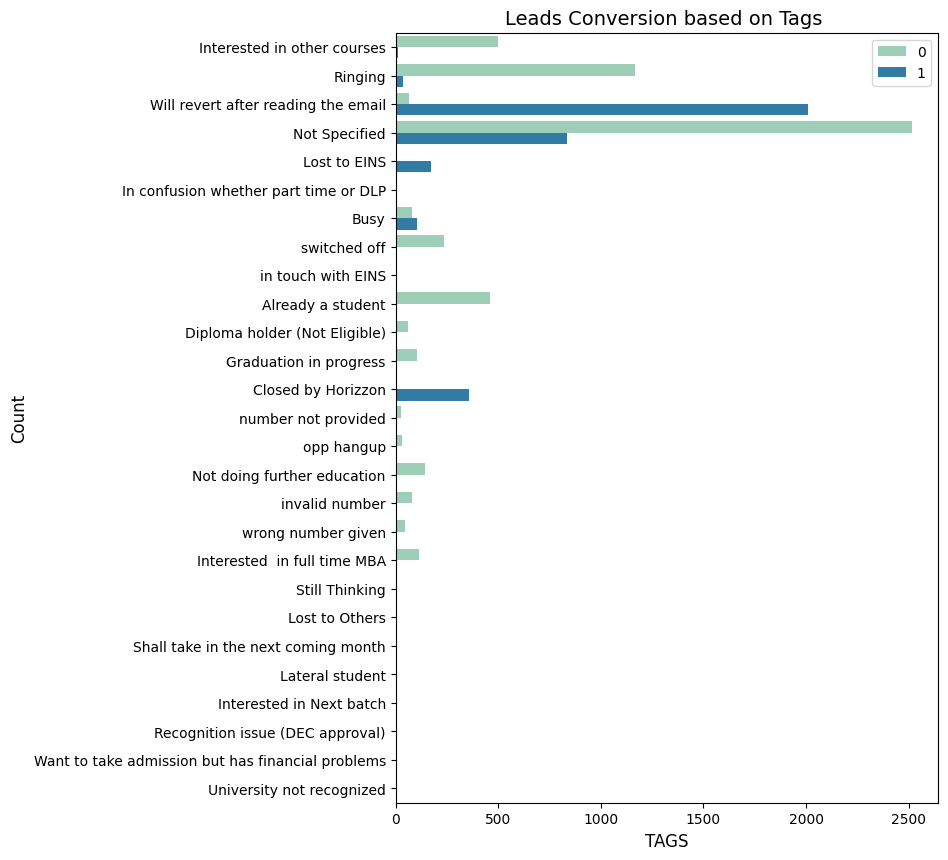

In [30]:
# Ploting on Tag variable
plt.figure(figsize=(7, 10))
count_fig=sns.countplot(y='Tags', hue=df['Converted'], data = df, palette='YlGnBu')
plt.title("Leads Conversion based on Tags ",fontsize=14)
plt.xlabel("TAGS", fontsize=12)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=12)
plt.show()

In [31]:
#Since some tags have very minimal values, we can replace them as "Other_Tags"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education',
                                     'invalid number','wrong number given','Interested  in full time MBA'], 'Other_Tags')


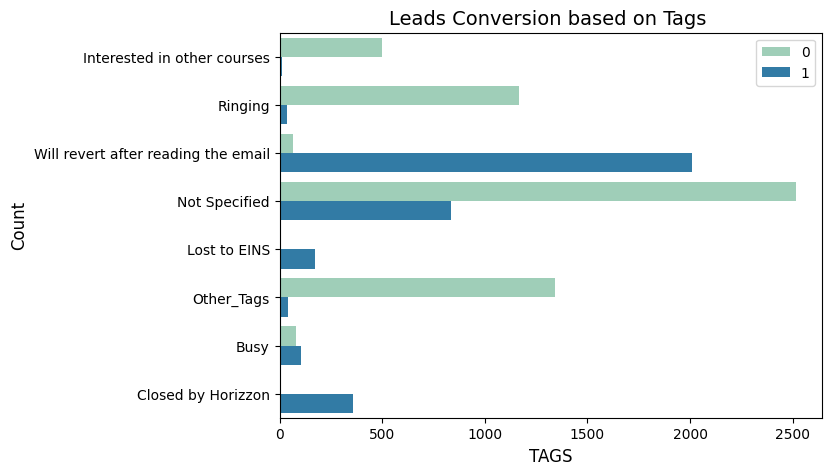

In [32]:
# Ploting on Tag variable
plt.figure(figsize=(7, 5))
count_fig=sns.countplot(y='Tags', hue=df['Converted'], data = df, palette='YlGnBu')
# count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)
plt.title("Leads Conversion based on Tags ",fontsize=14)
plt.xlabel("TAGS", fontsize=12)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=12)
plt.show()

In [33]:
# Checking column "What is your current occupation"

df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [34]:
# Replacing Null values with "Unemployed"

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Not Specified')

In [35]:
df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
Not Specified           2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

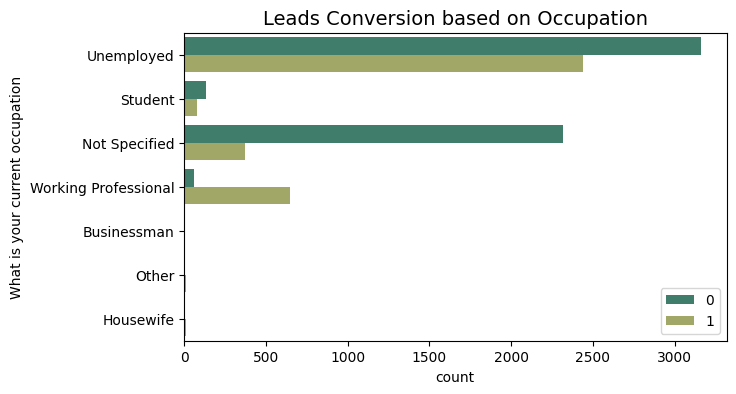

In [36]:
# Plotting the column "What is your current occupation"

plt.figure(figsize=(7, 4))
count_fig=sns.countplot(y='What is your current occupation', hue=df['Converted'], data= df, palette='gist_earth')
plt.title("Leads Conversion based on Occupation",fontsize=14)
plt.legend(loc=4)
plt.show()

In [37]:
# Ratio of categories after imputation
df['What is your current occupation'].value_counts(dropna=False,normalize = True,ascending=False)*100

What is your current occupation
Unemployed              60.606061
Not Specified           29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64

Insights-
1. There is a strong likelihood that working professionals will opt for the course.
2. The largest group among the leads consists of unemployed individuals, and those who didnot specify any choice.
3. Categories like housewives, businessmen, students, and others are less likely to convert and enroll in the course.

In [38]:
# Value counts of Country column

df['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

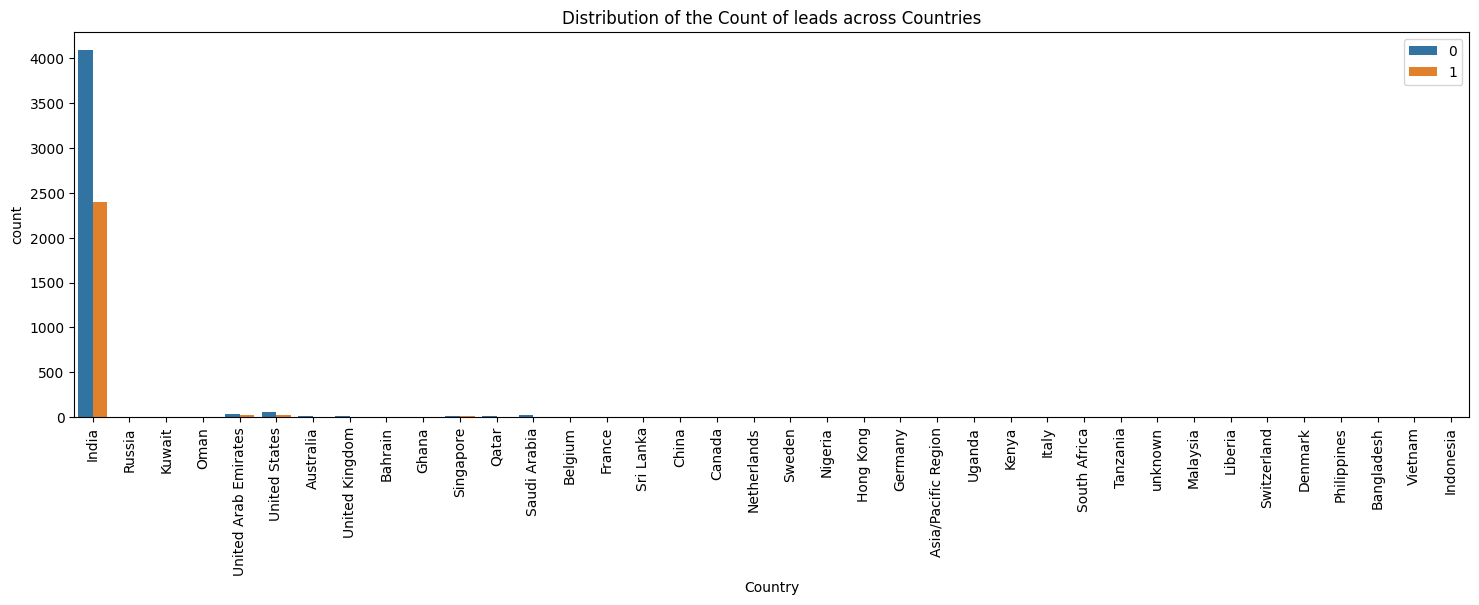

In [39]:
# Plotting the Country column
plt.figure(figsize=(18,5))
Count_fig=sns.countplot(x='Country', hue=df['Converted'], data = df)
Count_fig.set_xticklabels(Count_fig.get_xticklabels(),rotation=90)
plt.title("Distribution of the Count of leads across Countries")
plt.legend(loc=1)
plt.show()

In [40]:
# Checking mode in th Country Column 
df['Country'].mode()

0    India
Name: Country, dtype: object

In [41]:
# Replace null values with India
df['Country'] = df['Country'].replace(np.nan,'India')

In [42]:
df['Country'].value_counts()

Country
India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

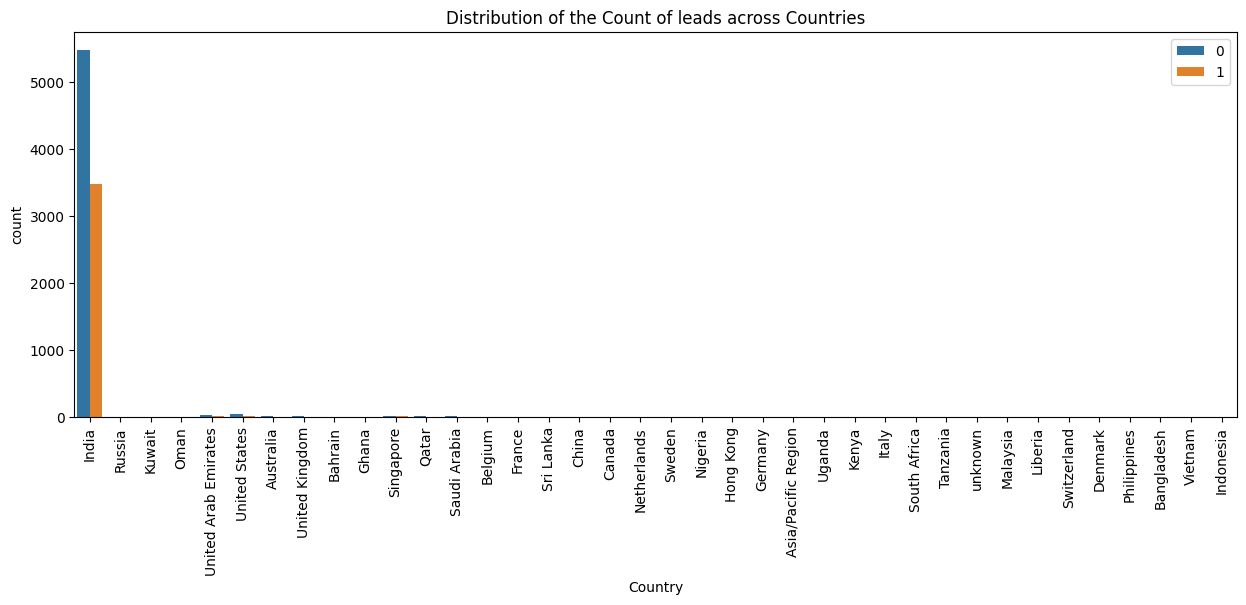

In [43]:
# Visualising the Country column after replacing NaN values
plt.figure(figsize=(15,5))
Count_fig=sns.countplot(x='Country', hue=df['Converted'], data = df)
Count_fig.set_xticklabels(Count_fig.get_xticklabels(),rotation=90)
plt.title("Distribution of the Count of leads across Countries")
plt.legend(loc=1)
plt.show()

Since "India" is tagged as the most occuring Country, it may not be suitable for an analysis - especially for a classification problem. Hence we can remove the Country column inorder to escape from the bias.

In [44]:
# Removing Country column frmom data
df.drop('Country',axis = 1,inplace=True)

In [45]:
# Checking percentage of Null values again
round(df.isna().sum().sort_values(ascending=False)/len(df)*100, 2)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Last Activity                             1.11
Lead Source                               0.39
Lead Origin                               0.00
Do Not Email                              0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [46]:
# Checking value counts of Lead Source column
df['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [47]:
# Since 'Lead Source' has less 'NaN' values we can replace it with 'Others'
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')

In [48]:
# Also we can combining low frequency values present in the Lead Source
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                                                   

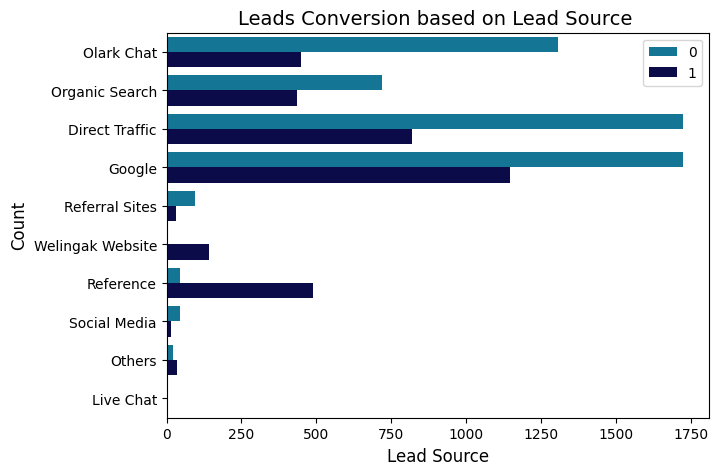

In [49]:
# Pltting on Lead Source variable
plt.figure(figsize=(7,5))
count_fig=sns.countplot(y='Lead Source', hue=df['Converted'], data=df, palette='ocean_r')
plt.title("Leads Conversion based on Lead Source ",fontsize=14)
plt.xlabel("Lead Source", fontsize=12)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=12)
plt.show()

Insights-
1. The majority of leads are generated through Google and direct traffic, with the fewest coming from live chat.
2. The Welingak website has the highest conversion rate.
3. Improving lead conversion can be achieved by maximizing leads from references and the Welingak website.
4. Focusing on Olark chat, organic search, direct traffic, and Google leads could further boost lead conversion rates.

In [50]:
# Checking 'Last Activity' variable
df['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [51]:
# Converting Null values to "others"
df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')

In [52]:
# Replacing categories which are less than 1% to Others as it does not make much impact for analysis

df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [53]:
df['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: count, dtype: int64

In [54]:
# Checking percentage of Null values again
round(df.isna().sum().sort_values(ascending=False)/len(df)*100, 2)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [55]:
# Few columns have less than 2% na values. We can afford to drop their respective rows altogehter. 
df = df.dropna()

In [56]:
round(df.isna().sum().sort_values(ascending=False)/len(df)*100, 2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [57]:
print(len(df.index))
print(len(df.index)/9240)

9103
0.9851731601731601


After data cleaning, we have retained 98.51% of data.

In [58]:
# Checking the Lead Origin variable
df['Lead Origin'].value_counts(dropna=False)

Lead Origin
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: count, dtype: int64

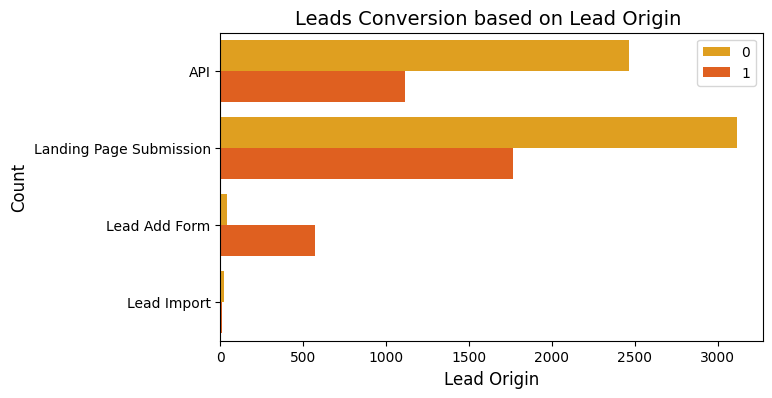

In [59]:
# Plotting count of Variable based on Converted value

plt.figure(figsize=(7,4))
count_fig=sns.countplot(y='Lead Origin', hue=df['Converted'], data = df, palette='autumn_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=0)
plt.title("Leads Conversion based on Lead Origin ",fontsize=14)
plt.xlabel("Lead Origin", fontsize=12)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=12)
plt.show()

Insights-
1. Both API and landing page submissions generate a high volume of leads and conversions.
2. While the lead add form has a strong conversion rate, the number of leads it generates is relatively low.
3. Increasing the number of leads through the lead add form could significantly boost the overall conversion rate and contribute to greater growth.

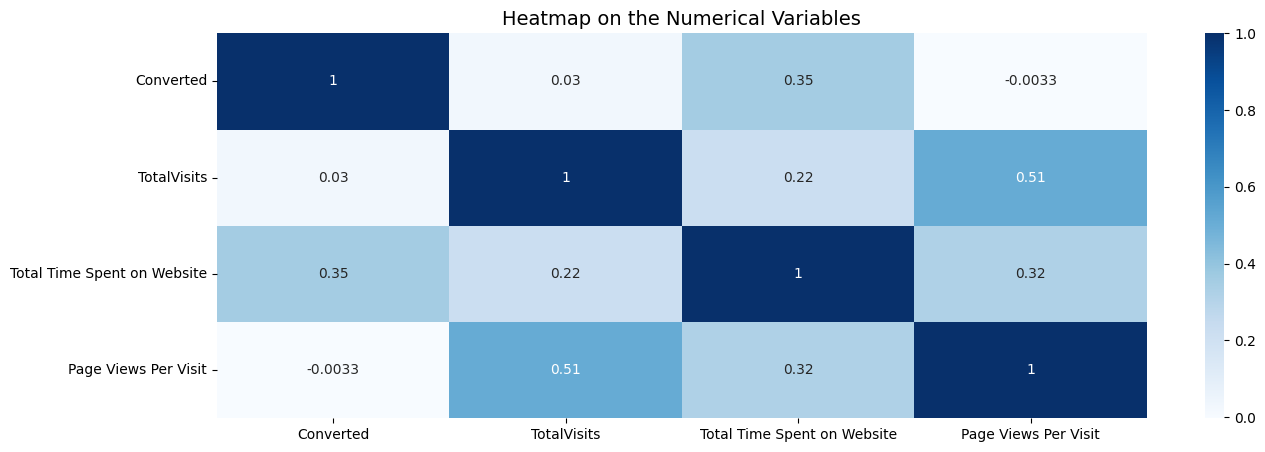

In [60]:
# Checking correlation through heatmap
plt.figure(figsize=(15,5))

# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plotting the heatmap
sns.heatmap(numeric_df.corr(), cmap="Blues", annot=True)
plt.title("Heatmap on the Numerical Variables", fontsize=14)
plt.show()


In [61]:
# Analysing the Total Time Spent on Website variable
df['Total Time Spent on Website'].describe()

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [62]:
df

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Others,Management_Specializations,Unemployed,Will revert after reading the email,Mumbai,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Other_Tags,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Other_Tags,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Management_Specializations,Not Specified,Not Specified,Other Metro Cities,No,SMS Sent


#### The next step is to deal with the categorical variables present in the dataset. 
First we shall take a look at which variables are actually categorical variables.

In [63]:
temp = df.loc[:, df.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [64]:
# Demo Cell
df_dummy = pd.DataFrame({'P': ['p', 'q', 'p']})
df_dummy

,P
0,p
1,q
2,p


In [65]:
pd.get_dummies(df_dummy).astype("int")

,P_p,P_q
0,1,0
1,0,1
2,1,0


In [66]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 
                           'Specialization', 'What is your current occupation', 
                           'A free copy of Mastering The Interview', 
                           'Last Notable Activity']], dtype=int)

In [67]:
# Add the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [68]:
# Drop the variables for which the dummy variables have been created

df = df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [69]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Tags,City,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,Interested in other courses,Mumbai,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,Ringing,Mumbai,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,Will revert after reading the email,Mumbai,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,Ringing,Mumbai,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,Will revert after reading the email,Mumbai,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


Check value counts on `Tags` and `City` if it has valid values

In [70]:
df.City.value_counts(dropna=False)

City
Mumbai                         6779
Thane & Outskirts               746
Other Cities                    680
Other Cities of Maharashtra     447
Other Metro Cities              377
Tier II Cities                   74
Name: count, dtype: int64

In [71]:
df.Tags.value_counts(dropna=False)

Tags
Not Specified                          3333
Will revert after reading the email    2035
Other_Tags                             1378
Ringing                                1189
Interested in other courses             509
Closed by Horizzon                      301
Busy                                    185
Lost to EINS                            173
Name: count, dtype: int64

In [72]:
## Drop Columns "City" an "Tags" as they do not contain reasonably valid values
df.drop(['City', 'Tags'], axis=1, inplace=True)

### Scaling
Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = MinMaxScaler()

# Select the columns to scale
columns_to_scale = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Apply the scaler on the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# View the scaled data
print(df)


      Converted  TotalVisits  Total Time Spent on Website  \
0             0     0.000000                     0.000000   
1             0     0.019920                     0.296655   
2             1     0.007968                     0.674296   
3             0     0.003984                     0.134243   
4             1     0.007968                     0.628521   
...         ...          ...                          ...   
9235          1     0.031873                     0.812060   
9236          0     0.007968                     0.104754   
9237          0     0.007968                     0.087588   
9238          1     0.011952                     0.219630   
9239          1     0.023904                     0.562940   

      Page Views Per Visit  Lead Origin_API  \
0                 0.000000                1   
1                 0.045455                1   
2                 0.036364                0   
3                 0.018182                0   
4                 0.018182      

In [75]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.000000,0.000000,0.000000,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.019920,0.296655,0.045455,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.007968,0.674296,0.036364,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.003984,0.134243,0.018182,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0.007968,0.628521,0.018182,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


### Looking at the correlations
Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

In [76]:
df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Converted,1.000000,0.030395,0.354939,-0.003328,-0.113685,-0.040698,0.306224,-0.010824,-0.075079,0.026621,...,-0.008209,0.044335,-0.264267,-0.071874,-0.034393,0.013383,0.362200,0.037599,-0.012218,-0.008209
TotalVisits,0.030395,1.000000,0.221240,0.512125,-0.204549,0.291913,-0.173909,-0.038378,0.096821,0.108667,...,-0.003120,0.022386,-0.106497,-0.037643,0.227681,-0.007439,-0.003932,0.005640,0.000971,0.009834
Total Time Spent on Website,0.354939,0.221240,1.000000,0.320361,-0.195333,0.294515,-0.194106,-0.051363,0.142287,0.216937,...,-0.003738,0.023007,-0.125220,-0.050408,0.029212,-0.009257,0.133511,0.009749,0.001349,-0.007545
Page Views Per Visit,-0.003328,0.512125,0.320361,1.000000,-0.349063,0.485950,-0.274411,-0.056927,0.134901,0.207549,...,-0.001760,0.014035,-0.094396,-0.087941,0.026698,-0.011459,0.055602,0.019580,0.018047,0.001490
Lead Origin_API,-0.113685,-0.204549,-0.195333,-0.349063,1.000000,-0.866221,-0.215290,-0.047042,-0.445903,0.013911,...,-0.008435,0.002854,0.122684,0.134721,-0.034289,0.013025,-0.110665,-0.002196,-0.010901,0.013025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Resubscribed to emails,0.013383,-0.007439,-0.009257,-0.011459,0.013025,-0.011283,-0.002804,-0.000613,-0.006526,-0.007118,...,-0.000110,-0.000411,-0.007848,-0.001501,-0.001994,1.000000,-0.005868,-0.000623,-0.000755,-0.000110
Last Notable Activity_SMS Sent,0.362200,-0.003932,0.133511,0.055602,-0.110665,0.049199,0.124841,-0.028300,0.013920,-0.004717,...,-0.005868,-0.021970,-0.419141,-0.080182,-0.106506,-0.005868,1.000000,-0.033249,-0.040329,-0.005868
Last Notable Activity_Unreachable,0.037599,0.005640,0.009749,0.019580,-0.002196,-0.000655,0.006414,-0.003472,-0.016297,0.011583,...,-0.000623,-0.002331,-0.044471,-0.008507,-0.011300,-0.000623,-0.033249,1.000000,-0.004279,-0.000623
Last Notable Activity_Unsubscribed,-0.012218,0.000971,0.001349,0.018047,-0.010901,0.014671,-0.006994,-0.004211,0.002973,-0.002750,...,-0.000755,-0.002827,-0.053940,-0.010319,-0.013706,-0.000755,-0.040329,-0.004279,1.000000,-0.000755


### Test-Train Split
The next step is to split the dataset into training an testing sets.

In [77]:
# Import the required library

from sklearn.model_selection import train_test_split

In [78]:
# Checking the available columns before splitting
df.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Do Not Email_No', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Busines

In [79]:
# Revisiting the info frame of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9103 non-null   int64  
 1   TotalVisits                                           9103 non-null   float64
 2   Total Time Spent on Website                           9103 non-null   float64
 3   Page Views Per Visit                                  9103 non-null   float64
 4   Lead Origin_API                                       9103 non-null   int32  
 5   Lead Origin_Landing Page Submission                   9103 non-null   int32  
 6   Lead Origin_Lead Add Form                             9103 non-null   int32  
 7   Lead Origin_Lead Import                               9103 non-null   int32  
 8   Lead Source_Direct Traffic                            9103 non-

In [80]:
# Put all the feature variables in X

X = df.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.019920,0.296655,0.045455,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.007968,0.674296,0.036364,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.003984,0.134243,0.018182,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.007968,0.628521,0.018182,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [81]:
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [82]:
# Split the dataset into 70% train and 30% test, and set the random state to 100

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Check the shape of the train dataset and the test dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6372, 64)
(2731, 64)
(6372,)
(2731,)


----

## Step 2: Model Building
Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [83]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [84]:
# Import necessary libraries
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=20)

In [85]:
# Fit RFE on the data
rfe = rfe.fit(X, y)

In [86]:
# Get the selected features
selected_features = X.columns[rfe.support_]

In [87]:
# View the selected features
print(selected_features)

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Not Specified',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not Specified',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')


In [88]:
# Importing lib to display full dataframe
from IPython.display import HTML

In [89]:
# Displaying full list of features with RFE support and ranking
HTML(pd.DataFrame(
    list(zip(X_train.columns, rfe.support_, rfe.ranking_)), 
    columns=['Features', 'RFE_Support', 'RFE_Ranking']
).sort_values(['RFE_Ranking'], ascending=True).to_html())

,Features,RFE_Support,RFE_Ranking
0,TotalVisits,True,1
41,What is your current occupation_Not Specified,True,1
44,What is your current occupation_Unemployed,True,1
45,What is your current occupation_Working Professional,True,1
27,Last Activity_SMS Sent,True,1
25,Last Activity_Others,True,1
52,Last Notable Activity_Email Opened,True,1
22,Last Activity_Email Opened,True,1
55,Last Notable Activity_Had a Phone Conversation,True,1
56,Last Notable Activity_Modified,True,1


In [90]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [91]:
# Select only the columns selected by RFE

X_train = X_train[col]

### Stage 1
Building model with top 20 features selected using RFE

In [92]:
import statsmodels.api as sm

In [93]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2526.6
Date:                Tue, 22 Oct 2024   Deviance:                       5053.2
Time:                        12:14:41   Pearson chi2:                 6.26e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4142
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1582      0.283     -4.100      0.000      -1.712      -0.605
TotalVisits                                             10.2055      2.587      3.944      0.000       5.134      15.277
Total Time Spent on Website                              4.5349      0.171     26.587      0.000       4.201       4.869
Page Views Per Visit                                    -3.9152      1.340     -2.922      0.003      -6.541      -1.289
Lead Origin_Landing Page Submission                     -0.8808      0.127     -6.928      0.000      -1.130      -0.632
Lead Origin_Lead Add Form                                3.1521      0.243     12.962      0.000       2.675       3.629
Lead Source_Olark Chat                                   0.9880      0.134      7.376      0.000       0.725       1.251
Lead Source_Welingak Website                             2.2741      0.756      3.007      0.003       0.792       3.756
Do Not Email_Yes                                        -1.3473      0.178     -7.561      0.000      -1.697      -0.998
Last Activity_Email Opened                               1.1523      0.159      7.245      0.000       0.841       1.464
Last Activity_Others                                     1.3361      0.241      5.543      0.000       0.864       1.809
Last Activity_SMS Sent                                   1.6374      0.120     13.667      0.000       1.403       1.872
Specialization_Not Specified                            -0.8351      0.123     -6.794      0.000      -1.076      -0.594
What is your current occupation_Housewife               22.9005   1.55e+04      0.001      0.999   -3.04e+04    3.04e+04
What is your current occupation_Not Specified           -1.3146      0.232     -5.661      0.000      -1.770      -0.859
What is your current occupation_Unemployed              -0.2175      0.222     -0.979      0.328      -0.653       0.218
What is your current occupation_Working Professional     2.2634      0.288      7.864      0.000       1.699       2.828
Last Notable Activity_Email Opened                      -0.8381      0.182     -4.602      0.000      -1.195      -0.481
Last Notable Activity_Had a Phone Conversation           1.8972      1.208      1.570      0.116      -0.471       4.265
Last Notable Activity_Modified                          -0.9772      0.114     -8.554      0.000      -1.201      -0.753
Last Notable Activity_Olark Chat Conversation           -0.9196      0.340     -2.701      0.007      -1.587      -0.252
========================================================================================================================
"""

#### There are quite a few variable which have a p-value greater than `0.05`. We will need to take care of them. But first, let's also look at the VIFs.

In [94]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,10.63
16,Last Notable Activity_Email Opened,8.49
8,Last Activity_Email Opened,7.40
3,Lead Origin_Landing Page Submission,6.12
13,What is your current occupation_Not Specified,5.99
2,Page Views Per Visit,3.98
11,Specialization_Not Specified,3.98
18,Last Notable Activity_Modified,3.28
10,Last Activity_SMS Sent,3.06
5,Lead Source_Olark Chat,2.36


#### VIFs seem to be in a decent range except for 5 variables per above table.

Let's first drop the variable "What is your current occupation_Unemployed" since it has a high p-value as well as a high VIF.

In [96]:
X_train.drop("What is your current occupation_Unemployed", axis=1, inplace=True)

### Stage 2
ReBuilding model after removing `What is your current occupation_Unemployed`

In [97]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2527.1
Date:                Tue, 22 Oct 2024   Deviance:                       5054.1
Time:                        12:14:42   Pearson chi2:                 6.26e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4141
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3681      0.184     -7.431      0.000      -1.729      -1.007
TotalVisits                                             10.2047      2.588      3.943      0.000       5.132      15.277
Total Time Spent on Website                              4.5342      0.171     26.584      0.000       4.200       4.869
Page Views Per Visit                                    -3.9047      1.340     -2.915      0.004      -6.530      -1.279
Lead Origin_Landing Page Submission                     -0.8809      0.127     -6.926      0.000      -1.130      -0.632
Lead Origin_Lead Add Form                                3.1542      0.243     12.974      0.000       2.678       3.631
Lead Source_Olark Chat                                   0.9921      0.134      7.409      0.000       0.730       1.255
Lead Source_Welingak Website                             2.2669      0.756      2.998      0.003       0.785       3.749
Do Not Email_Yes                                        -1.3456      0.178     -7.548      0.000      -1.695      -0.996
Last Activity_Email Opened                               1.1528      0.159      7.246      0.000       0.841       1.465
Last Activity_Others                                     1.3287      0.241      5.515      0.000       0.857       1.801
Last Activity_SMS Sent                                   1.6332      0.120     13.645      0.000       1.399       1.868
Specialization_Not Specified                            -0.8365      0.123     -6.800      0.000      -1.078      -0.595
What is your current occupation_Housewife               23.1091   1.55e+04      0.001      0.999   -3.04e+04    3.04e+04
What is your current occupation_Not Specified           -1.1048      0.090    -12.326      0.000      -1.280      -0.929
What is your current occupation_Working Professional     2.4729      0.193     12.833      0.000       2.095       2.851
Last Notable Activity_Email Opened                      -0.8371      0.182     -4.596      0.000      -1.194      -0.480
Last Notable Activity_Had a Phone Conversation           1.8991      1.209      1.571      0.116      -0.470       4.268
Last Notable Activity_Modified                          -0.9763      0.114     -8.548      0.000      -1.200      -0.752
Last Notable Activity_Olark Chat Conversation           -0.9120      0.340     -2.681      0.007      -1.579      -0.245
========================================================================================================================
"""

In [98]:

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Notable Activity_Email Opened,8.03
8,Last Activity_Email Opened,7.36
3,Lead Origin_Landing Page Submission,4.59
2,Page Views Per Visit,3.85
11,Specialization_Not Specified,3.12
17,Last Notable Activity_Modified,2.75
10,Last Activity_SMS Sent,2.56
1,Total Time Spent on Website,2.15
5,Lead Source_Olark Chat,2.09
0,TotalVisits,1.97


#### Let's now drop the variable "Last Notable Activity_Email Opened" since it has a high p-value as well as a high VIF.

In [99]:
X_train.drop("Last Notable Activity_Email Opened", axis=1, inplace=True)

### Stage 3
ReBuilding model after removing `Last Notable Activity_Email Opened`

In [100]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2537.4
Date:                Tue, 22 Oct 2024   Deviance:                       5074.9
Time:                        12:14:44   Pearson chi2:                 6.29e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4122
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6029      0.178     -9.026      0.000      -1.951      -1.255
TotalVisits                                             10.9093      2.600      4.195      0.000       5.813      16.006
Total Time Spent on Website                              4.5438      0.170     26.679      0.000       4.210       4.878
Page Views Per Visit                                    -4.0513      1.335     -3.035      0.002      -6.668      -1.435
Lead Origin_Landing Page Submission                     -0.8767      0.127     -6.902      0.000      -1.126      -0.628
Lead Origin_Lead Add Form                                3.1957      0.243     13.133      0.000       2.719       3.673
Lead Source_Olark Chat                                   1.0070      0.134      7.534      0.000       0.745       1.269
Lead Source_Welingak Website                             2.2270      0.757      2.942      0.003       0.744       3.710
Do Not Email_Yes                                        -1.3029      0.177     -7.347      0.000      -1.650      -0.955
Last Activity_Email Opened                               0.6247      0.113      5.514      0.000       0.403       0.847
Last Activity_Others                                     1.3656      0.239      5.708      0.000       0.897       1.835
Last Activity_SMS Sent                                   1.7964      0.115     15.637      0.000       1.571       2.022
Specialization_Not Specified                            -0.8338      0.123     -6.788      0.000      -1.075      -0.593
What is your current occupation_Housewife               23.1085   1.55e+04      0.001      0.999   -3.04e+04    3.05e+04
What is your current occupation_Not Specified           -1.1179      0.089    -12.507      0.000      -1.293      -0.943
What is your current occupation_Working Professional     2.4746      0.193     12.842      0.000       2.097       2.852
Last Notable Activity_Had a Phone Conversation           2.0938      1.209      1.732      0.083      -0.276       4.463
Last Notable Activity_Modified                          -0.6613      0.091     -7.266      0.000      -0.840      -0.483
Last Notable Activity_Olark Chat Conversation           -0.6917      0.337     -2.049      0.040      -1.353      -0.030
========================================================================================================================
"""

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,4.32
2,Page Views Per Visit,3.82
11,Specialization_Not Specified,2.99
8,Last Activity_Email Opened,2.65
10,Last Activity_SMS Sent,2.43
1,Total Time Spent on Website,2.15
5,Lead Source_Olark Chat,2.06
0,TotalVisits,1.97
16,Last Notable Activity_Modified,1.95
4,Lead Origin_Lead Add Form,1.70


#### Let's now drop the variable "What is your current occupation_Housewife" since it has a high p-value.

In [102]:
X_train.drop("What is your current occupation_Housewife", axis=1, inplace=True)

### Stage 4
ReBuilding model after removing `What is your current occupation_Housewife`

In [103]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2544.0
Date:                Tue, 22 Oct 2024   Deviance:                       5088.1
Time:                        12:14:44   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4110
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5937      0.177     -8.994      0.000      -1.941      -1.246
TotalVisits                                             10.8103      2.593      4.169      0.000       5.728      15.893
Total Time Spent on Website                              4.5404      0.170     26.696      0.000       4.207       4.874
Page Views Per Visit                                    -4.0964      1.334     -3.071      0.002      -6.711      -1.482
Lead Origin_Landing Page Submission                     -0.8708      0.127     -6.866      0.000      -1.119      -0.622
Lead Origin_Lead Add Form                                3.1964      0.243     13.147      0.000       2.720       3.673
Lead Source_Olark Chat                                   1.0022      0.134      7.505      0.000       0.740       1.264
Lead Source_Welingak Website                             2.2216      0.757      2.935      0.003       0.738       3.705
Do Not Email_Yes                                        -1.3050      0.177     -7.365      0.000      -1.652      -0.958
Last Activity_Email Opened                               0.6264      0.113      5.543      0.000       0.405       0.848
Last Activity_Others                                     1.3583      0.239      5.680      0.000       0.890       1.827
Last Activity_SMS Sent                                   1.7901      0.115     15.614      0.000       1.565       2.015
Specialization_Not Specified                            -0.8367      0.123     -6.819      0.000      -1.077      -0.596
What is your current occupation_Not Specified           -1.1229      0.089    -12.571      0.000      -1.298      -0.948
What is your current occupation_Working Professional     2.4658      0.193     12.805      0.000       2.088       2.843
Last Notable Activity_Had a Phone Conversation           2.0938      1.209      1.732      0.083      -0.276       4.464
Last Notable Activity_Modified                          -0.6571      0.091     -7.233      0.000      -0.835      -0.479
Last Notable Activity_Olark Chat Conversation           -0.6921      0.337     -2.051      0.040      -1.354      -0.031
========================================================================================================================
"""

In [104]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,4.32
2,Page Views Per Visit,3.82
11,Specialization_Not Specified,2.99
8,Last Activity_Email Opened,2.65
10,Last Activity_SMS Sent,2.43
1,Total Time Spent on Website,2.14
5,Lead Source_Olark Chat,2.06
0,TotalVisits,1.97
15,Last Notable Activity_Modified,1.95
4,Lead Origin_Lead Add Form,1.70


#### Let's now drop the variable "Last Notable Activity_Had a Phone Conversation" since it has a high p-value.

In [105]:
X_train.drop("Last Notable Activity_Had a Phone Conversation", axis=1, inplace=True)

In [106]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2546.0
Date:                Tue, 22 Oct 2024   Deviance:                       5091.9
Time:                        12:14:45   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4106
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5843      0.177     -8.951      0.000      -1.931      -1.237
TotalVisits                                             10.7584      2.589      4.156      0.000       5.684      15.832
Total Time Spent on Website                              4.5391      0.170     26.703      0.000       4.206       4.872
Page Views Per Visit                                    -4.0706      1.333     -3.055      0.002      -6.682      -1.459
Lead Origin_Landing Page Submission                     -0.8706      0.127     -6.871      0.000      -1.119      -0.622
Lead Origin_Lead Add Form                                3.1970      0.243     13.149      0.000       2.720       3.674
Lead Source_Olark Chat                                   1.0019      0.134      7.504      0.000       0.740       1.264
Lead Source_Welingak Website                             2.2270      0.757      2.942      0.003       0.744       3.711
Do Not Email_Yes                                        -1.3226      0.177     -7.469      0.000      -1.670      -0.976
Last Activity_Email Opened                               0.6189      0.113      5.481      0.000       0.398       0.840
Last Activity_Others                                     1.4556      0.231      6.294      0.000       1.002       1.909
Last Activity_SMS Sent                                   1.7839      0.115     15.568      0.000       1.559       2.009
Specialization_Not Specified                            -0.8395      0.123     -6.846      0.000      -1.080      -0.599
What is your current occupation_Not Specified           -1.1214      0.089    -12.558      0.000      -1.296      -0.946
What is your current occupation_Working Professional     2.4633      0.193     12.787      0.000       2.086       2.841
Last Notable Activity_Modified                          -0.6670      0.091     -7.354      0.000      -0.845      -0.489
Last Notable Activity_Olark Chat Conversation           -0.6995      0.337     -2.073      0.038      -1.361      -0.038
========================================================================================================================
"""

In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,4.32
2,Page Views Per Visit,3.82
11,Specialization_Not Specified,2.99
8,Last Activity_Email Opened,2.65
10,Last Activity_SMS Sent,2.43
1,Total Time Spent on Website,2.14
5,Lead Source_Olark Chat,2.06
0,TotalVisits,1.97
14,Last Notable Activity_Modified,1.95
4,Lead Origin_Lead Add Form,1.70


In [108]:
final_col = X_train.columns

In [109]:
final_col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Not Specified',
       'What is your current occupation_Not Specified',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

----

## Step 3: Model Evaluation
Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [110]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [111]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convertion_Prob':y_train_pred})
# y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Convertion_Prob
0,0,0.871672
1,0,0.126296
2,0,0.140579
3,1,0.969164
4,0,0.309390


In [112]:
from sklearn import metrics

#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [113]:
y_train_pred_final['predicted'] = y_train_pred_final.Convertion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convertion_Prob,predicted
0,0,0.871672,1
1,0,0.126296,0
2,0,0.140579,0
3,1,0.969164,1
4,0,0.309390,0


In [114]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3498  455]
 [ 710 1709]]


In [115]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8171688637790333


#### Metrics beyond simply accuracy

In [116]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [117]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7064902852418354

In [118]:
# Let us calculate specificity
TN / float(TN+FP)

0.8848975461674677

In [119]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11510245383253226


In [120]:
# positive predictive value 
print (TP / float(TP+FP))

0.7897412199630314


In [121]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8312737642585551


#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [122]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [123]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convertion_Prob, drop_intermediate = False )

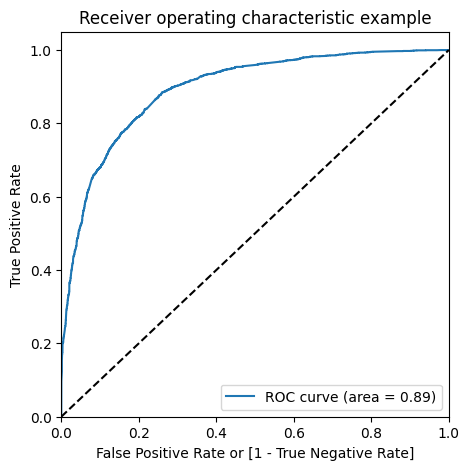

In [124]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convertion_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [125]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convertion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convertion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.871672,1,1,1,1,1,1,1,1,1,1,0
1,0,0.126296,0,1,1,0,0,0,0,0,0,0,0
2,0,0.140579,0,1,1,0,0,0,0,0,0,0,0
3,1,0.969164,1,1,1,1,1,1,1,1,1,1,1
4,0,0.309390,0,1,1,1,1,0,0,0,0,0,0


In [126]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.627746  0.971889  0.417152
0.2   0.2  0.762398  0.914427  0.669365
0.3   0.3  0.796924  0.867301  0.753858
0.4   0.4  0.817012  0.774700  0.842904
0.5   0.5  0.817169  0.706490  0.884898
0.6   0.6  0.811205  0.615130  0.931192
0.7   0.7  0.789548  0.533278  0.946370
0.8   0.8  0.766164  0.435304  0.968631
0.9   0.9  0.723164  0.293510  0.986087


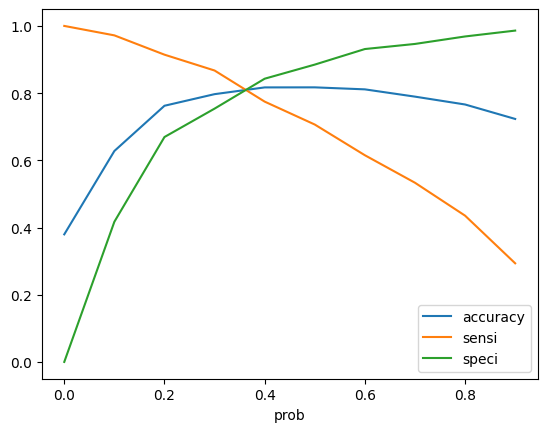

In [127]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [128]:
cutoff_df.shape

(10, 4)

In [129]:
pd.DataFrame(np.zeros(10).reshape((-1,1))+.36, columns=['cuutoffpt'], index=cutoff_df.index)

,cuutoffpt
0.0,0.36
0.1,0.36
0.2,0.36
0.3,0.36
0.4,0.36
0.5,0.36
0.6,0.36
0.7,0.36
0.8,0.36
0.9,0.36


In [130]:
pd.concat([
    cutoff_df, 
    pd.DataFrame(np.zeros(10).reshape((-1,1))+.36, columns=['cutoffpt'], index=cutoff_df.index)
], axis=1)

,prob,accuracy,sensi,speci,cutoffpt
0.0,0.0,0.379630,1.000000,0.000000,0.36
0.1,0.1,0.627746,0.971889,0.417152,0.36
0.2,0.2,0.762398,0.914427,0.669365,0.36
0.3,0.3,0.796924,0.867301,0.753858,0.36
0.4,0.4,0.817012,0.774700,0.842904,0.36
0.5,0.5,0.817169,0.706490,0.884898,0.36
0.6,0.6,0.811205,0.615130,0.931192,0.36
0.7,0.7,0.789548,0.533278,0.946370,0.36
0.8,0.8,0.766164,0.435304,0.968631,0.36
0.9,0.9,0.723164,0.293510,0.986087,0.36


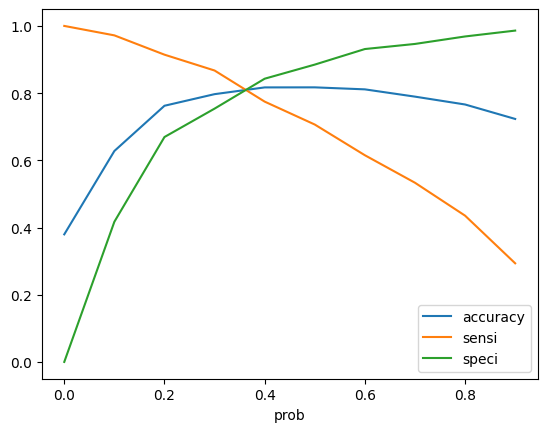

In [131]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<Figure size 640x480 with 0 Axes>

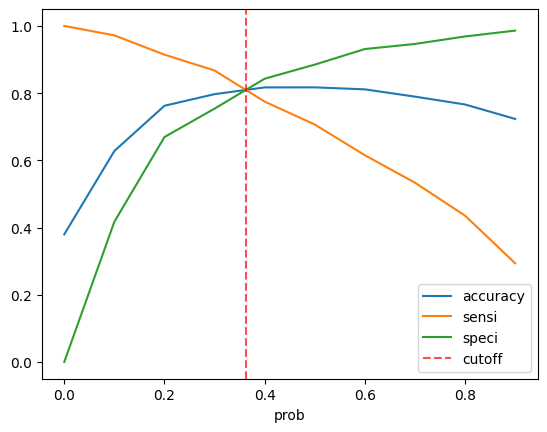

In [132]:
# Let's plot accuracy sensitivity and specificity for various probabilities with observed cutoff from above plot.
plt.figure()
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(.362, label='cutoff', color=('r', .7), linestyle='--')
plt.legend()
plt.show()

#### From the curve above, 0.362 is the optimum point to take it as a cutoff probability.

In [133]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convertion_Prob.map( lambda x: 1 if x > 0.362 else 0)

y_train_pred_final.head()

,Converted,Convertion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.871672,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.126296,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.140579,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.969164,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.309390,0,1,1,1,1,0,0,0,0,0,0,0


### Recalculating performance metrics

In [134]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion)

[[3232  721]
 [ 477 1942]]


In [135]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.8119899560577527


Metrics beyond simply accuracy

In [136]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [137]:
# Let's see the sensitivity aka. Recall score of our logistic regression model
TP / float(TP+FN)

0.8028110789582472

In [138]:
# Let us calculate specificity
TN / float(TN+FP)

0.8176068808499873

In [139]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18239311915001266


In [140]:
# positive predictive value aka. Precision score 
print (TP / float(TP+FP))

0.7292527224934284


In [141]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8713939067133999


**Using sklearn utilities for cross checking the precision & recall scores**

In [142]:
from sklearn.metrics import precision_score, recall_score

In [143]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7292527224934284

In [144]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8028110789582472

### Precision and recall tradeoff

In [145]:
from sklearn.metrics import precision_recall_curve

In [146]:
precision_recall_curve(y_true=y_train_pred_final.Converted, y_score=y_train_pred_final.final_predicted)

(array([0.37962963, 0.72925272, 1.        ]),
 array([1.        , 0.80281108, 0.        ]),
 array([0, 1], dtype=int64))

In [147]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [148]:
p,r,thresholds

(array([0.37962963, 0.72925272, 1.        ]),
 array([1.        , 0.80281108, 0.        ]),
 array([0, 1], dtype=int64))

In [149]:
y_train_pred_final

,Converted,Convertion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.871672,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.126296,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.140579,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.969164,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.309390,0,1,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367,0,0.059994,0,1,0,0,0,0,0,0,0,0,0,0
6368,1,0.867718,1,1,1,1,1,1,1,1,1,1,0,1
6369,1,0.640511,1,1,1,1,1,1,1,1,0,0,0,1
6370,1,0.862571,1,1,1,1,1,1,1,1,1,1,0,1


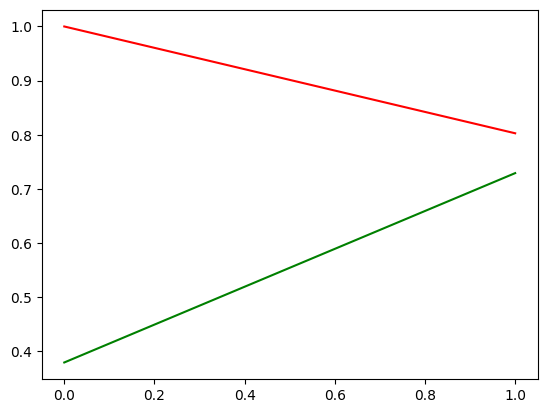

In [150]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

----

## Step 4: Making predictions on the test set

In [151]:
# Scaling float dtype features using scaler created using training phase
X_test[X_test.select_dtypes('float').columns] = scaler.transform(X_test[X_test.select_dtypes('float').columns])

In [152]:
final_col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Not Specified',
       'What is your current occupation_Not Specified',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [153]:
X_test = X_test[final_col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Opened,Last Activity_Others,Last Activity_SMS Sent,Specialization_Not Specified,What is your current occupation_Not Specified,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
3504,0.000048,0.000082,0.000992,1,0,0,0,0,1,0,0,0,0,0,0,0
4050,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,1,0,0,0,0,0
7201,0.000032,0.000138,0.000661,1,0,0,0,1,0,0,1,0,0,0,0,0
1196,0.000063,0.000082,0.001322,1,0,0,0,0,1,0,0,0,0,0,0,0
8219,0.000111,0.000048,0.000579,1,0,0,0,0,0,0,0,0,0,0,0,0


In [154]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [155]:
y_test_pred = res.predict(X_test_sm)

In [156]:
y_test_pred[:10]

3504    0.137159
4050    0.967599
7201    0.119701
1196    0.137020
8219    0.079015
8747    0.127377
9048    0.014036
6524    0.042127
7693    0.119649
8187    0.928052
dtype: float64

In [157]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred,columns=['Predicted_Convertion'])

In [158]:
# Let's see the head
y_pred_1.head()

,Predicted_Convertion
3504,0.137159
4050,0.967599
7201,0.119701
1196,0.137020
8219,0.079015


In [159]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test,columns=['Converted'])

In [160]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df.reset_index(drop=True), y_pred_1.reset_index(drop=True)],axis=1)

In [161]:
y_pred_final.head()

,Converted,Predicted_Convertion
0,0,0.137159
1,1,0.967599
2,0,0.119701
3,0,0.137020
4,1,0.079015


In [162]:
y_pred_final['final_predicted'] = y_pred_final.Predicted_Convertion.map(lambda x: 1 if x > 0.362 else 0)

In [163]:
y_pred_final[:10]

,Converted,Predicted_Convertion,final_predicted
0,0,0.137159,0
1,1,0.967599,1
2,0,0.119701,0
3,0,0.137020,0
4,1,0.079015,0
5,0,0.127377,0
6,1,0.014036,0
7,0,0.042127,0
8,0,0.119649,0
9,0,0.928052,1


### Calculating performance metrics for precdictions on test set

In [164]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion)

[[1644   45]
 [ 651  391]]


In [165]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

0.7451482973269864


Metrics beyond simply accuracy

In [166]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [167]:
# Let's see the sensitivity aka. Recall score of our logistic regression model
TP / float(TP+FN)

0.3752399232245681

In [168]:
# Let us calculate specificity
TN / float(TN+FP)

0.9733570159857904

In [169]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.02664298401420959


In [170]:
# positive predictive value aka. Precision score 
print (TP / float(TP+FP))

0.8967889908256881


In [171]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7163398692810458


In [172]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8967889908256881

In [173]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.3752399232245681

### Final Conclusions and score interpretation
* By observing the above model performance metrics, although recall score is fairly low, other metrics are in the desirable range. And we could say that the model predictions are good.
* However, if we want to further improve the model performance in terms of recall as well, we can calculate the above metrics at every iteration of feature elimination (after selecting the feature limit, here considered as 20, at final iteration got 16 features), and stop where further feature elimination is causing significant impact in the model evaluation metrics.

----

# ~~ End of Solution ~~

----

----

## Analysis for answering subjective questions

----

#### 1.	Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?

In [184]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2546.0
Date:                Tue, 22 Oct 2024   Deviance:                       5091.9
Time:                        12:15:55   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4106
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5843      0.177     -8.951      0.000      -1.931      -1.237
TotalVisits                                             10.7584      2.589      4.156      0.000       5.684      15.832
Total Time Spent on Website                              4.5391      0.170     26.703      0.000       4.206       4.872
Page Views Per Visit                                    -4.0706      1.333     -3.055      0.002      -6.682      -1.459
Lead Origin_Landing Page Submission                     -0.8706      0.127     -6.871      0.000      -1.119      -0.622
Lead Origin_Lead Add Form                                3.1970      0.243     13.149      0.000       2.720       3.674
Lead Source_Olark Chat                                   1.0019      0.134      7.504      0.000       0.740       1.264
Lead Source_Welingak Website                             2.2270      0.757      2.942      0.003       0.744       3.711
Do Not Email_Yes                                        -1.3226      0.177     -7.469      0.000      -1.670      -0.976
Last Activity_Email Opened                               0.6189      0.113      5.481      0.000       0.398       0.840
Last Activity_Others                                     1.4556      0.231      6.294      0.000       1.002       1.909
Last Activity_SMS Sent                                   1.7839      0.115     15.568      0.000       1.559       2.009
Specialization_Not Specified                            -0.8395      0.123     -6.846      0.000      -1.080      -0.599
What is your current occupation_Not Specified           -1.1214      0.089    -12.558      0.000      -1.296      -0.946
What is your current occupation_Working Professional     2.4633      0.193     12.787      0.000       2.086       2.841
Last Notable Activity_Modified                          -0.6670      0.091     -7.354      0.000      -0.845      -0.489
Last Notable Activity_Olark Chat Conversation           -0.6995      0.337     -2.073      0.038      -1.361      -0.038
========================================================================================================================
"""

In [186]:
res.params.sort_values(ascending=False)

TotalVisits                                             10.758387
Total Time Spent on Website                              4.539055
Lead Origin_Lead Add Form                                3.197021
What is your current occupation_Working Professional     2.463349
Lead Source_Welingak Website                             2.227039
Last Activity_SMS Sent                                   1.783915
Last Activity_Others                                     1.455578
Lead Source_Olark Chat                                   1.001892
Last Activity_Email Opened                               0.618922
Last Notable Activity_Modified                          -0.666979
Last Notable Activity_Olark Chat Conversation           -0.699499
Specialization_Not Specified                            -0.839479
Lead Origin_Landing Page Submission                     -0.870552
What is your current occupation_Not Specified           -1.121375
Do Not Email_Yes                                        -1.322593
const     

In [187]:
res.params.abs().sort_values(ascending=False)

TotalVisits                                             10.758387
Total Time Spent on Website                              4.539055
Page Views Per Visit                                     4.070615
Lead Origin_Lead Add Form                                3.197021
What is your current occupation_Working Professional     2.463349
Lead Source_Welingak Website                             2.227039
Last Activity_SMS Sent                                   1.783915
const                                                    1.584309
Last Activity_Others                                     1.455578
Do Not Email_Yes                                         1.322593
What is your current occupation_Not Specified            1.121375
Lead Source_Olark Chat                                   1.001892
Lead Origin_Landing Page Submission                      0.870552
Specialization_Not Specified                             0.839479
Last Notable Activity_Olark Chat Conversation            0.699499
Last Notab

**Based on the final model and absolute value of coefficients of the parameters/variables, we can conclude that below are the top 3 variables/features from the data that is ready for modeling.**
1. `TotalVisits` with coefficient of 10.758387
2. `Total Time Spent on Website` with coefficient of 4.539055
3. `Page Views Per Visit` with coefficient of 4.070615 (absolute),
> if considering non-absolute value then based on +ve sign, top 3rd variable is `Lead Origin_Lead Add Form` with coefficient of 3.197021

----

#### 2.	What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?

In [174]:
df.shape

(9103, 65)

In [175]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.000000,0.000000,0.000000,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.019920,0.296655,0.045455,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.007968,0.674296,0.036364,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.003984,0.134243,0.018182,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0.007968,0.628521,0.018182,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [176]:
# Import necessary libraries
from sklearn.feature_selection import RFE
top3_rfe = RFE(estimator=logreg, n_features_to_select=3)

In [177]:
# Fit RFE on the data
top3_rfe = top3_rfe.fit(df.iloc[:,1:], df.iloc[:,0])

In [179]:
# Get the selected features
top3_selected_features = df.iloc[:,1:].columns[top3_rfe.support_]

In [180]:
# View the selected features
print(top3_selected_features)

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional'],
      dtype='object')


In [181]:
# Importing lib to display full dataframe
from IPython.display import HTML

In [182]:
# Displaying full list of features with RFE support and ranking
HTML(pd.DataFrame(
    list(zip(df.iloc[:,1:].columns, top3_rfe.support_, top3_rfe.ranking_)), 
    columns=['Features', 'RFE_Support', 'RFE_Ranking']
).sort_values(['RFE_Ranking'], ascending=True).to_html())

,Features,RFE_Support,RFE_Ranking
1,Total Time Spent on Website,True,1
45,What is your current occupation_Working Professional,True,1
5,Lead Origin_Lead Add Form,True,1
55,Last Notable Activity_Had a Phone Conversation,False,2
16,Lead Source_Welingak Website,False,3
18,Do Not Email_Yes,False,4
40,What is your current occupation_Housewife,False,5
27,Last Activity_SMS Sent,False,6
41,What is your current occupation_Not Specified,False,7
0,TotalVisits,False,8


**Based on above RFE procedure, we obtained that below are the top 3 variables features from the data that is ready for modeling.**
1. `Total Time Spent on Website`
2. `Lead Origin_Lead Add Form`
3. `What is your current occupation_Working Professional`

----

#### 3.	X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.

The effective strategy would be to choose the leads based on the coefficient/weight of the variable, ie., giving higher priority to those leads who are positive on the highest weighted variable then gradually moving towards the next top weighted vairables in the descending order of weight of variables.

#### 4.	Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

Similar to the strategy stated as answer for the previous question(3), the effective strategy would be to choose only those new leads based on the coefficient/weight of the variable to make phone call, ie., giving higher priority to those leads who are positive (or larger value in case of numeric/non-binary number) on the highest weighted variable then gradually moving towards the next top weighted vairables in the descending order of weight of variables.

----

***~~~~~~~~~~~~~~~~~~~ End of Notebook ~~~~~~~~~~~~~~~~~~~***